In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [44]:
dataset = pd.read_csv("./dataset/occupancy_est.csv")
#average out s1_temp, s2_temp, s3_temp and s4_temp into temperature
dataset.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

## Data Description

In [45]:
dataset.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


## Check for misising or null values

In [46]:
dataset.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

# Data Pre-processing
## 1. Split the data into training and testing sets
## 2. Feature Scaling

In [47]:

# Scaling the data
scaler = StandardScaler()
encoder = OneHotEncoder()
# Select only the numeric columns
numeric_columns = dataset.select_dtypes(include=np.number).columns
categorical_columns = ["Date"]

dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
dataset.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,-0.314749,-0.294029,0.673063
1,2017/12/22,10:50:12,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,-0.314749,-0.294029,0.673063
2,2017/12/22,10:50:42,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,-0.314749,-0.294029,0.673063
3,2017/12/22,10:51:13,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,-0.314749,-0.294029,0.673063
4,2017/12/22,10:51:44,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,-0.314749,-0.294029,0.673063


In [49]:
# encoding
days_of_week = pd.get_dummies(dataset["Date"],prefix="day",dtype=int)
dataset = pd.concat([dataset,days_of_week],axis=1)
dataset.head()


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S6_PIR,S7_PIR,Room_Occupancy_Count,day_2017/12/22,day_2017/12/23,day_2017/12/24,day_2017/12/25,day_2017/12/26,day_2018/01/10,day_2018/01/11
0,2017/12/22,10:49:41,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
1,2017/12/22,10:50:12,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
2,2017/12/22,10:50:42,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
3,2017/12/22,10:51:13,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
4,2017/12/22,10:51:44,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0


In [50]:
dataset.drop("Date",axis=1,inplace=True)
dataset.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S6_PIR,S7_PIR,Room_Occupancy_Count,day_2017/12/22,day_2017/12/23,day_2017/12/24,day_2017/12/25,day_2017/12/26,day_2018/01/10,day_2018/01/11
0,10:49:41,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
1,10:50:12,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
2,10:50:42,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
3,10:51:13,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
4,10:51:44,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0


In [51]:
time = pd.to_datetime(dataset["Time"],format="%H:%M:%S")
dataset["Time"] = time.dt.hour + time.dt.minute/60
dataset.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S6_PIR,S7_PIR,Room_Occupancy_Count,day_2017/12/22,day_2017/12/23,day_2017/12/24,day_2017/12/25,day_2017/12/26,day_2018/01/10,day_2018/01/11
0,10.816667,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
1,10.833333,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
2,10.833333,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
3,10.850000,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0
4,10.850000,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,...,-0.314749,-0.294029,0.673063,1,0,0,0,0,0,0


We notice that we have particular days from our EDA. So we can categorize the dates but not the time.



In [52]:

#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('Room_Occupancy_Count', axis=1), dataset['Room_Occupancy_Count'], test_size=0.2, random_state=42)

In [53]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)


LinearRegression()

In [54]:
pd.DataFrame(linear_reg_model.coef_, index=x_train.columns, columns=["Coefficient"])

,Coefficient
Time,-0.008547
S1_Temp,0.022188
S2_Temp,0.077949
S3_Temp,0.463222
S4_Temp,-0.324856
S1_Light,0.316444
S2_Light,0.062181
S3_Light,0.166176
S4_Light,-0.096810
S1_Sound,0.033859


# Model Residuals

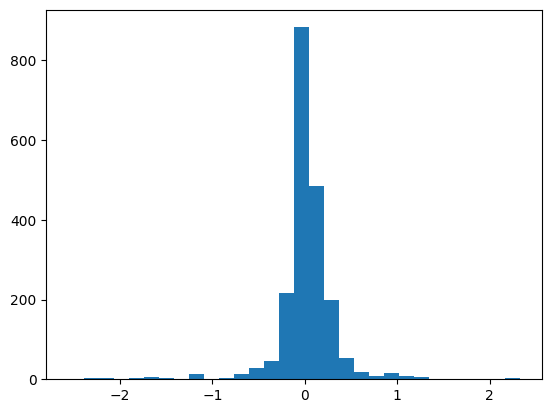

In [59]:
predictions = linear_reg_model.predict(x_test)
plt.hist(predictions-y_test, bins=30);

They are normally distributed. Good sign.

# Performance Evaluation

- Mean absolute error
- Mean squared error
- Root mean squared error

In [61]:
from sklearn import metrics

In [62]:
metrics.mean_absolute_error(y_test, predictions)

0.1825388887062944

In [65]:
metrics.mean_squared_error(y_test, predictions)

0.10942177302854858

In [64]:
metrics.root_mean_squared_error(y_test, predictions)

0.33078962049699895

AttributeError: 'LinearRegression' object has no attribute 'summary'